Importo librerías.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as stats
from wordcloud import WordCloud

Cargo los dataframes previamente creados.

In [3]:
df_games = pd.read_parquet(r'D:\1er Proyecto\datasets_finales\games.parquet')
df_items = pd.read_parquet(r'D:\1er Proyecto\datasets_finales\user_items.parquet')
df_reviews = pd.read_parquet(r'D:\1er Proyecto\datasets_finales\reviews.parquet')

Veo por encima la información que contienen de forma resumida.

In [4]:
df_games.describe(include='all') 

,genres,name,tags,specs,price,item_id,developer,year
count,23946,23946,23925,23946,23946.000000,23946,23946,23946.0
unique,871,23924,13026,3512,NaN,23945,10725,<NA>
top,[Action],Wolfenstein II: The New Colossus,[Simulation],[Single-player],NaN,612880,Dovetail Games,<NA>
freq,1646,2,971,2756,NaN,2,253,<NA>
mean,NaN,NaN,NaN,NaN,8.935535,NaN,NaN,2014.679028
std,NaN,NaN,NaN,NaN,16.627783,NaN,NaN,3.482552
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1983.0
25%,NaN,NaN,NaN,NaN,1.990000,NaN,NaN,2014.0
50%,NaN,NaN,NaN,NaN,4.990000,NaN,NaN,2016.0
75%,NaN,NaN,NaN,NaN,9.990000,NaN,NaN,2017.0


In [5]:
df_reviews.describe(include='all') 

,user_id,item_id,helpful,recommend,year,sentiment_analysis
count,45709,45709,45709,45709,45709.0,45709.000000
unique,20383,3432,1248,2,<NA>,NaN
top,chicken_tonight,730,No ratings yet,True,<NA>,NaN
freq,20,2550,22641,40050,<NA>,NaN
mean,NaN,NaN,NaN,NaN,2014.255923,1.521888
std,NaN,NaN,NaN,NaN,0.824472,0.789321
min,NaN,NaN,NaN,NaN,2010.0,0.000000
25%,NaN,NaN,NaN,NaN,2014.0,1.000000
50%,NaN,NaN,NaN,NaN,2014.0,2.000000
75%,NaN,NaN,NaN,NaN,2015.0,2.000000


In [6]:
df_items.describe(include='all')

,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
count,5153209,5.153209e+06,5.153209e+06,5.153209e+06,5153209,5.153209e+06,5153209
unique,70912,NaN,NaN,NaN,10947,NaN,4450
top,phrostb,NaN,NaN,NaN,Dota 2 Test,NaN,0
freq,7762,NaN,NaN,NaN,49571,NaN,5014707
mean,NaN,3.147229e+02,7.656120e+16,1.784481e+05,NaN,9.914951e+02,NaN
std,NaN,6.933596e+02,3.916645e+07,1.318598e+05,NaN,5.418204e+03,NaN
min,NaN,1.000000e+00,7.656120e+16,1.000000e+01,NaN,0.000000e+00,NaN
25%,NaN,7.200000e+01,7.656120e+16,3.446000e+04,NaN,0.000000e+00,NaN
50%,NaN,1.380000e+02,7.656120e+16,2.144200e+05,NaN,3.400000e+01,NaN
75%,NaN,2.760000e+02,7.656120e+16,2.664300e+05,NaN,3.550000e+02,NaN


EDA GAMES

In [8]:
# Aseguro que df_items['item_id'] es string y eliminar espacios en df_games['item_id']
df_items['item_id'] = df_items['item_id'].astype(str)
df_games['item_id'] = df_games['item_id'].str.strip()

EDA_games = df_games.copy()

# Calculo la cantidad de ventas de cada item
ventas_por_item = df_items['item_id'].value_counts().reset_index()
ventas_por_item.columns = ['item_id', 'cantidad_ventas']

# Convierto 'item_id' en ambos dataframes al mismo tipo de dato (str)
EDA_games['item_id'] = EDA_games['item_id'].astype(str)
ventas_por_item['item_id'] = ventas_por_item['item_id'].astype(str)

# Fusiono el dataframe 'ventas_por_item' con 'EDA_games' basado en 'item_id'
EDA_games = pd.merge(EDA_games, ventas_por_item, on='item_id', how='left')

# 'price' a tipo float
EDA_games['price'] = EDA_games['price'].astype(float)

# Convertir 'cantidad_ventas' a int, reemplazando NaN por 0 primero
EDA_games['cantidad_ventas'] = EDA_games['cantidad_ventas'].fillna(0).astype(int)

# Calcular el total de ventas multiplicando la cantidad de ventas por el precio
EDA_games['total_ventas'] = EDA_games['cantidad_ventas'] * EDA_games['price']

EDA_games

,genres,name,tags,specs,price,item_id,developer,year,cantidad_ventas,total_ventas
0,[Action],Counter-Strike,"[Action, FPS, Multiplayer, Shooter, Classic, ...","[Multi-player, Valve Anti-Cheat enabled]",9.99,10,Valve,2000,9735,97252.65
1,[Indie],Rag Doll Kung Fu,"[Indie, Fighting, Multiplayer]","[Single-player, Multi-player]",9.99,1002,Mark Healey,2005,64,639.36
2,"[Animation &amp, Modeling]",Silo 2,"[Animation & Modeling, Software]",None,99.99,100400,Nevercenter Ltd. Co.,2012,16,1599.84
3,[Action],Call of Duty: World at War,"[Zombies, World War II, FPS, Action, Multipla...","[Single-player, Multi-player, Co-op]",19.99,10090,Treyarch,2008,4012,80199.88
4,"[Animation &amp, Modeling]",3D-Coat V4.8,[Animation & Modeling],[Steam Cloud],99.99,100980,Pilgway,2012,19,1899.81
...,...,...,...,...,...,...,...,...,...,...
23941,"[Casual, Indie, Strategy]",NightSky,"[Indie, Platformer, Casual, Puzzle, Physics, ...",[Single-player],9.99,99700,"Nicalis, Inc.",2011,1323,13216.77
23942,[Casual],The UnderGarden,"[Casual, Puzzle, Relaxing, Exploration]",[Single-player],6.99,9980,Artech Studios,2010,80,559.20
23943,"[Adventure, Casual, Free to Play, Massively Mu...",Puzzle Pirates,"[Free to Play, Massively Multiplayer, Puzzle,...","[Single-player, Multi-player, MMO, Co-op, Ste...",0.00,99910,Three Rings,2011,572,0.00
23944,"[Action, Adventure]",Ghostbusters: Sanctum of Slime Challenge Pack...,"[Action, Adventure]","[Single-player, Downloadable Content, Steam A...",1.99,9992,Behaviour,2011,0,0.00


Veamos ventas por género de videjuego.

In [9]:
EDA_games_genres = EDA_games.copy()

EDA_games_genres = EDA_games_genres.groupby('genres').agg({'cantidad_ventas': 'sum', 'total_ventas': 'sum'}).reset_index()

EDA_games_genres

,genres,cantidad_ventas,total_ventas
0,"[Accounting, Animation &amp, Modeling, Audio P...",0,0.00
1,"[Accounting, Utilities]",0,0.00
2,[Accounting],0,0.00
3,"[Action, Adventure, Casual, Free to Play, Indi...",263,0.00
4,"[Action, Adventure, Casual, Free to Play, Indi...",0,0.00
...,...,...,...
866,"[Utilities, Video Production]",170,1094.29
867,"[Utilities, Web Publishing]",0,0.00
868,[Utilities],4286,40538.99
869,[Video Production],70,3529.30


Top de géneros más vendidos.

In [10]:
EDA_games_genres = EDA_games_genres.sort_values(by='total_ventas', ascending=False)

EDA_games_genres.head()

,genres,cantidad_ventas,total_ventas
388,[Action],815394,12003879.59
164,"[Action, Adventure]",285343,5849267.44
863,[Strategy],206332,3760834.17
364,"[Action, RPG]",155131,2952575.69
341,"[Action, Indie]",179565,1944593.73


Separo correctamente cada género para que no estén agrupados.

In [11]:
generos_dict = {}

# Creo una función para separar los géneros y agregarlos al diccionario si no están agregados anteriormente
def agregar_generos(cantidad_ventas, generos_str):
    # Remuevo los corchetes y comillas
    generos_str = generos_str.strip("[]").replace("'", "")
    # Separo los géneros por coma
    generos = generos_str.split(", ")
    # Agrego los géneros al diccionario junto con la cantidad de ventas si no están ya presentes
    for genero in generos:
        if genero not in generos_dict:
            generos_dict[genero] = cantidad_ventas
        else:
            generos_dict[genero] += cantidad_ventas

# Aplico la función a la columna 'genres'
EDA_games_genres.apply(lambda row: agregar_generos(row['cantidad_ventas'], row['genres']), axis=1)

print(generos_dict)

{'Action': 2784956, 'Adventure': 1150832, 'Strategy': 800295, 'RPG': 897450, 'Indie': 1719977, 'Simulation': 533967, 'Free to Play': 741047, 'Racing': 102011, 'Sports': 100794, 'Massively Multiplayer': 361424, 'Early Access': 122772, 'Casual': 483370, 'Design &amp': 8692, 'Illustration': 8692, 'Web Publishing': 3854, 'Animation &amp': 7160, 'Modeling': 7160, 'Education': 3096, 'Software Training': 2336, 'Utilities': 9627, 'Video Production': 4562, 'Audio Production': 835, 'Photo Editing': 596, 'Accounting': 0}


In [12]:
df_generos = pd.DataFrame(list(generos_dict.items()), columns=['Genero', 'Cantidad_ventas'])

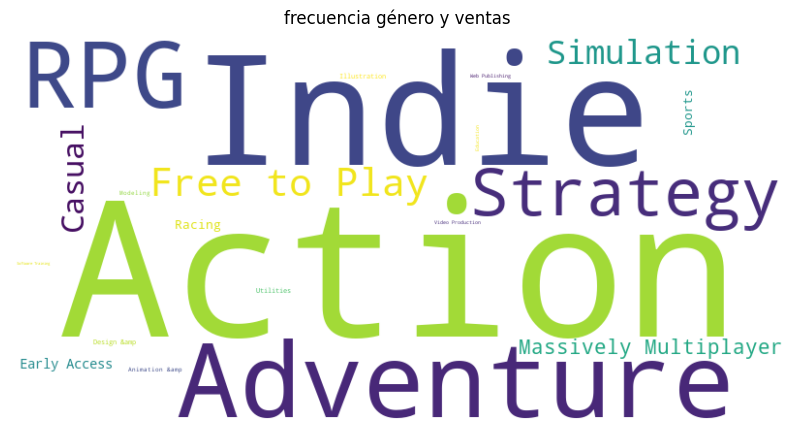

In [13]:
genero_cantidad_ventas = dict(zip(df_generos['Genero'], df_generos['Cantidad_ventas']))
# Creo la wordcloud con los datos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genero_cantidad_ventas)

# Muestro la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('frecuencia género y ventas')
plt.show()

La relación del año en el que un juego fue lanzado y su cantidad de ventas.

In [16]:
EDA_games_year = EDA_games.copy()

# Primero, agrupa el dataframe 'nuevo_items' por year y suma las cantidades de ventas y las ventas totales
EDA_games_year = EDA_games_year.groupby('year').agg({'cantidad_ventas': 'sum', 'total_ventas': 'sum'}).reset_index()

# Elimino nulos
EDA_games_year = EDA_games_year[EDA_games_year['cantidad_ventas'] != 0.0]

EDA_games_year.tail(10)

,year,cantidad_ventas,total_ventas
26,2009,241955,3699538.51
27,2010,256493,4345146.14
28,2011,373331,4524060.67
29,2012,542888,7148031.67
30,2013,535315,8495954.48
31,2014,537365,6228668.47
32,2015,493695,5270994.95
33,2016,269736,3337778.52
34,2017,118459,1403858.16
35,2018,140,538.60


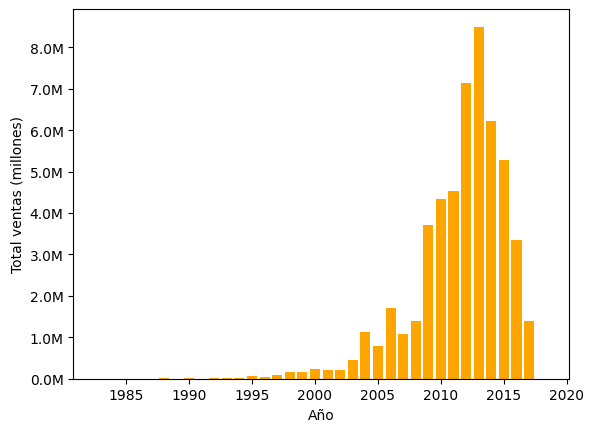

In [20]:
x = EDA_games_year['year'].values
height = EDA_games_year['total_ventas'].values

fig, ax = plt.subplots()
ax.set_xlabel('Año')
ax.set_ylabel('Total ventas (millones)')
plt.bar(x, height, width=0.8, align='center', color='orange')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}M'))

plt.show()

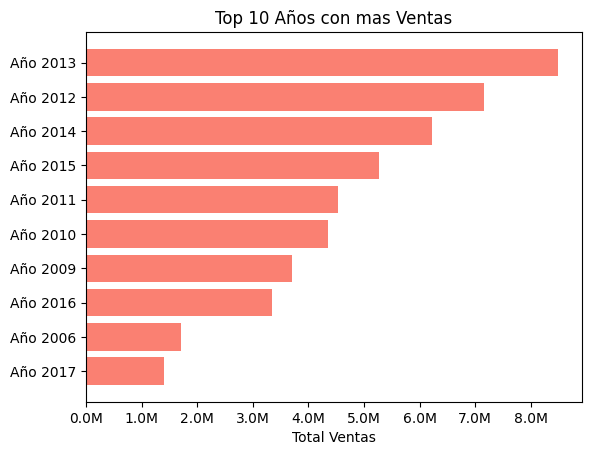

In [25]:
top_10_years = EDA_games_year.nlargest(10, 'total_ventas')

x = top_10_years['year'].values
y = top_10_years['total_ventas'].values

fig, ax = plt.subplots()

people = ['Año ' + str(year) for year in x]
y_pos = np.arange(len(people))

ax.barh(y_pos, y, align='center', color='salmon')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()
ax.set_xlabel('Total Ventas')
ax.set_title('Top 10 Años con mas Ventas')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}M'))

plt.show()

Gráfico de mejores desarrolladoras.

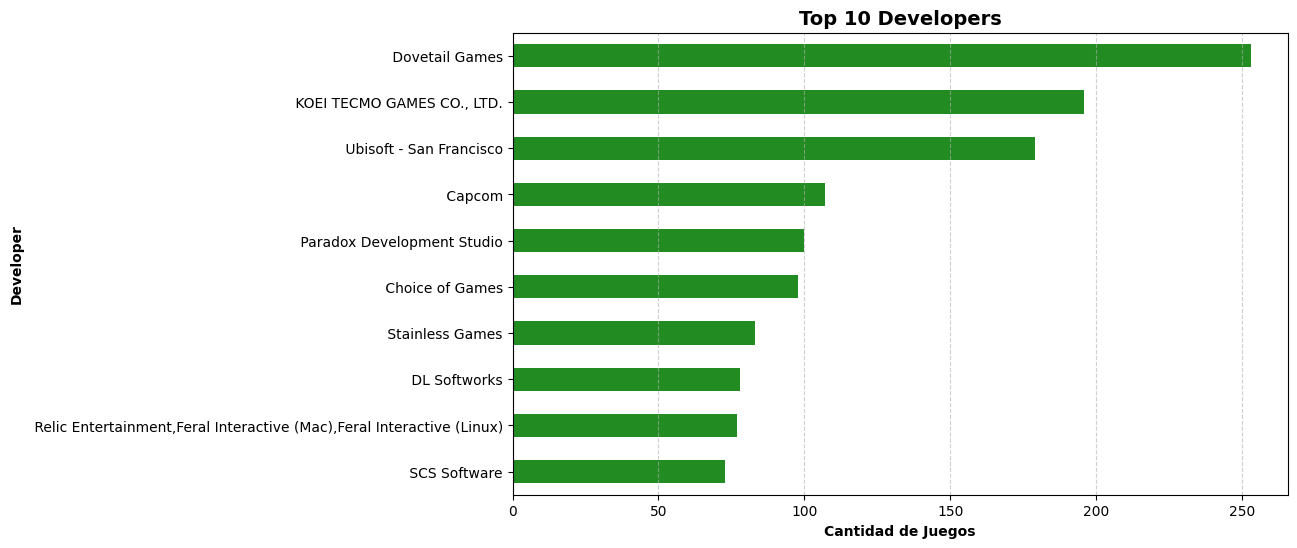

In [27]:
conteo_developer = df_games['developer'].value_counts()

plt.figure(figsize=(10, 6))

conteo_developer[:10].sort_values().plot(kind='barh', color='forestgreen')
plt.title('Top 10 Developers', fontsize=14, weight='bold')
plt.xlabel('Cantidad de Juegos', weight='bold')
plt.ylabel('Developer', weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

Los juegos más adquiridos.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17468\2301614220.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='playtime_forever', y='name', data=merged_data.groupby('name')['playtime_forever'].sum().sort_values(ascending=False).head(10).reset_index(), palette='rocket')


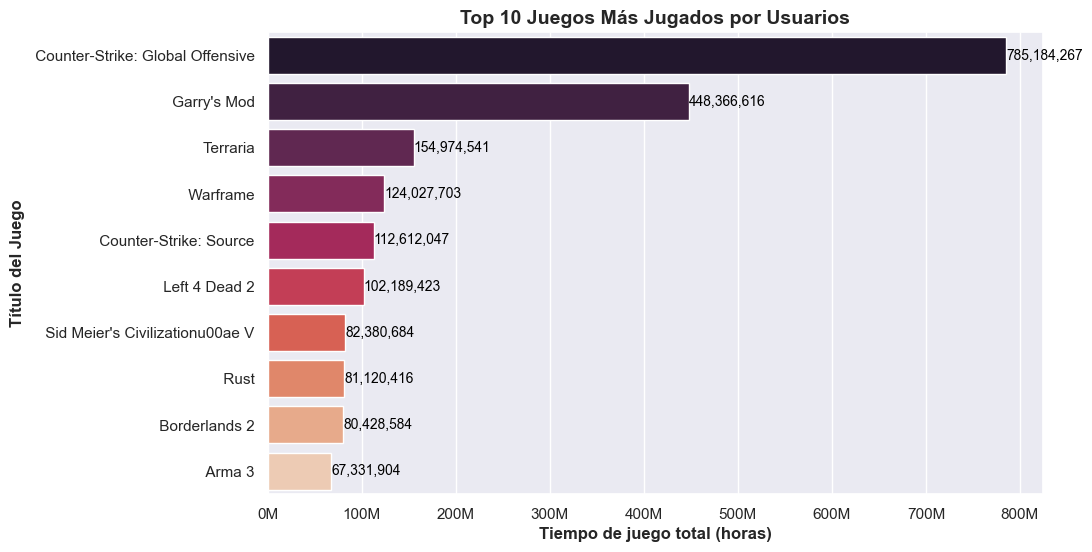

In [31]:
merged_data = pd.merge(df_games, df_items, left_on='item_id', right_on='item_id', how='inner')

sns.set(style='darkgrid')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='playtime_forever', y='name', data=merged_data.groupby('name')['playtime_forever'].sum().sort_values(ascending=False).head(10).reset_index(), palette='rocket')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

ax.set_xlabel('Tiempo de juego total (horas)', weight='bold')
ax.set_ylabel('Título del Juego', weight='bold')
ax.set_title('Top 10 Juegos Más Jugados por Usuarios', fontsize=14, weight='bold')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))

plt.show()

EDA REVIEWS

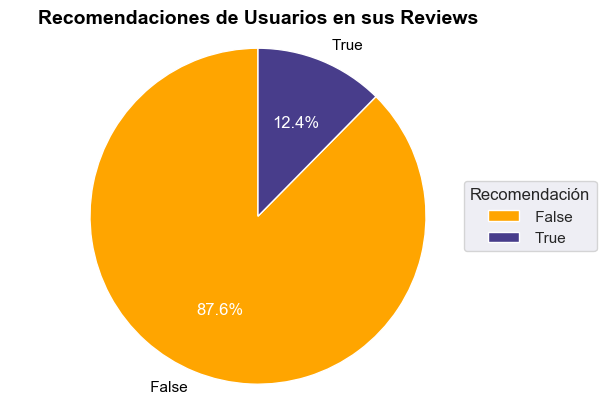

In [33]:
# Agrupamos los valores y ordenamos de menor a mayor
cant_recommend = df_reviews['recommend'].groupby(df_reviews['recommend']).count()
recommend = df_reviews['recommend'].unique()
colores = ['#FFA500', '#483D8B']  # Naranja y azul oscuro tirando a morado

fig, piechart_3 = plt.subplots()
wedges, _, autopcts = piechart_3.pie(sorted_cant_recommend, labels=sorted_recommend, autopct='%1.1f%%', colors=colores, startangle=90, textprops={'color': 'black'}, pctdistance=0.6, labeldistance=1.1)

for autopct in autopcts:
    autopct.set_color('white')

piechart_3.legend(wedges, sorted_recommend, title="Recomendación", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
piechart_3.axis('equal')
piechart_3.set_title('Recomendaciones de Usuarios en sus Reviews', color='black', fontsize=14, weight='bold')

plt.show()